Czy regresja liniowa jest modelem odpowiednim dla danych data1.csv? Jak odpowiednio przygotować dane do modelowania?

Zrób odpowiednie obliczenia i wizualizacje. Zapisz obserwacje i wnioski.

In [1320]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_squared_error, r2_score
)
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

path = "data1.csv"
df = pd.read_csv(path, sep=',')

df.head(10)

,x1,x2,y
0,-9.632982,380.285723,-382.598729
1,60.908243,239.463394,-170.322897
2,-198.541302,62.397808,-252.646037
3,-420.984843,346.470458,-760.169653
4,5.043047,283.229031,-268.320209
5,-537.504826,387.963941,-916.994934
6,179.224059,84.935644,101.097112
7,-157.124689,73.361804,-221.829940
8,-36.593427,209.902573,-239.470681
9,-1.537538,116.491656,-109.242110


In [1321]:
df.describe()

,x1,x2,y
count,100.000000,100.000000,100.000000
mean,-16.516452,194.787410,-187.672542
std,251.828994,114.163784,299.078952
min,-589.775534,6.635132,-916.994934
25%,-90.396867,90.159514,-325.494505
50%,-0.975545,199.571187,-158.721861
75%,89.149205,294.257264,-41.646005
max,558.750000,394.754775,805.000000


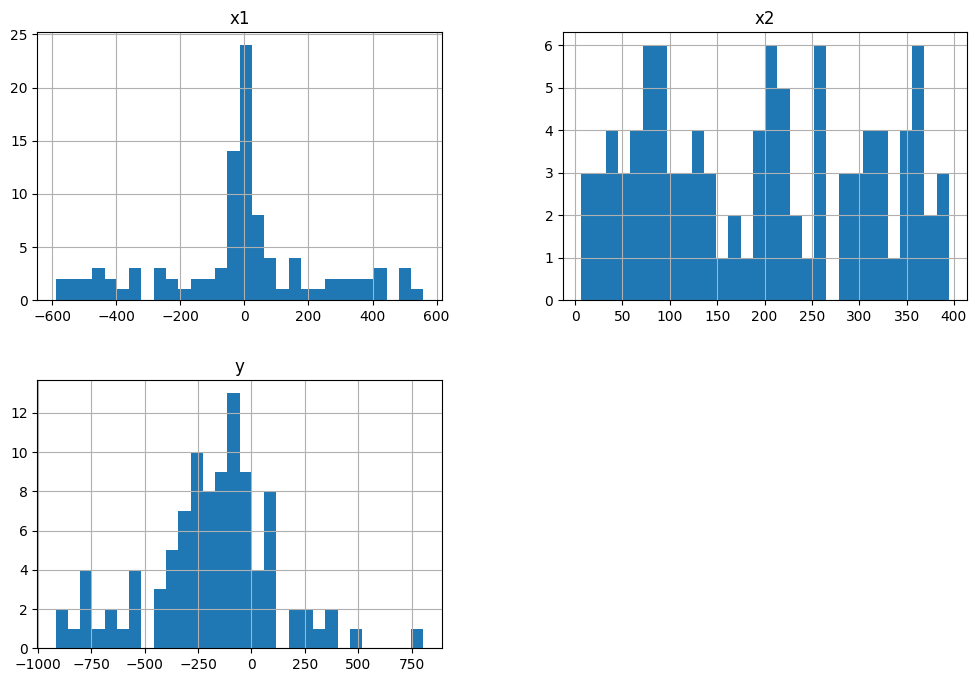

In [1322]:
df.hist(bins=30, figsize=(12,8))
plt.show()

Text(0.5, 1.0, 'zaleznosci x2 i y')

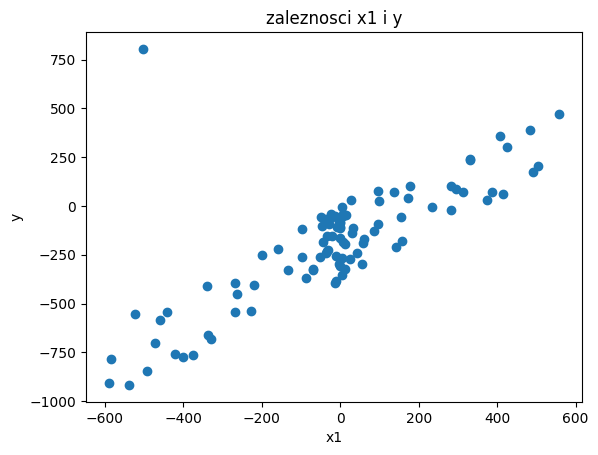

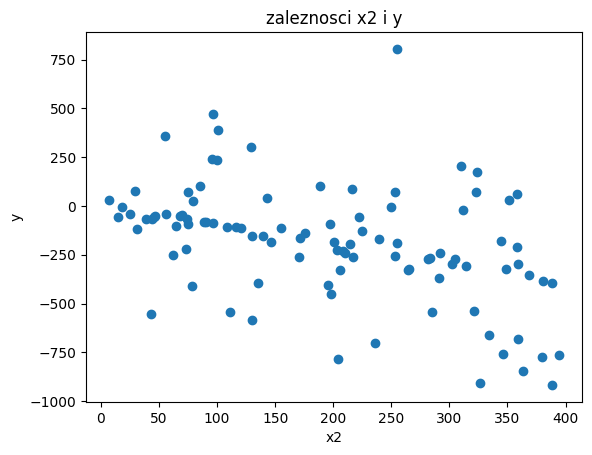

In [1323]:
plt.figure()
plt.scatter(df['x1'], df['y'])
plt.xlabel('x1')
plt.ylabel('y')
plt.title('zaleznosci x1 i y')

plt.figure()
plt.scatter(df['x2'], df['y'])
plt.xlabel('x2')
plt.ylabel('y')
plt.title('zaleznosci x2 i y')

In [1324]:
corr_m = df.corr()
print(corr_m)

          x1        x2         y
x1  1.000000 -0.103316  0.780708
x2 -0.103316  1.000000 -0.440934
y   0.780708 -0.440934  1.000000


Obserwacje:
- Pomiędzy x1 a y jest mocna zalezność liniowa
- Pomiedzy x2 a y slabsza
- Pomiedzy x1 a x2 nie ma

Z załozen regresji:
- jest liniowa zaleznosc
- nie ma wspolliniowosci - x1 i x2 nie sa ze soba mocno zwiazane

Czyli regresja będzie odpowiednia.

In [1325]:
def preprocess_data(x_train, y_train):
    
    scal = StandardScaler()
    x_proc = scal.fit_transform(x_train)

    return x_proc, y_train, scal 

Korzystając z biblioteki sklearn, dopasuj do danych data1.csv model regresji liniowej oraz sprawdź jego skuteczność, korzystając z błędu średniokwadratowego. Sprawdź, jak użycie przygotowania da-
nych zaproponowanego w Zadaniu 1 wpływa na otrzymane wyniki.

Zaproponuj odpowiedni podział danych. Czy będzie on taki sam przy budowanie pojedynczego
modelu jak również w sytuacji, kiedy chcemy wybrać jeden spośród kilku modeli?

Podział danych nie będzie taki sam, przy pojedynczym modelu dzielimy na train/test np.80/20.
Jesli chcemy wybrac jeden sposrod kilku bierzemy osobno dane do wytrenowania, do sprawdzenia ktory z modeli jest lepszy oraz do finalnego sprawdzenia wybranego modelu (np. 60/20/20).

tutaj podziele normalnie 80/20:

Podział danych:

In [1326]:
X = df[['x1', 'x2']]
Y = df['y']

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=True, random_state=42
)


Model baselinowy bez preprocessingu:

In [1327]:
x_train_base = x_train[['x1']]
x_test_base = x_test[['x1']]

model_base = LinearRegression()
model_base.fit(x_train_base, y_train)

y_pred = model_base.predict(x_test_base)

mse_dumm = mean_squared_error(y_test, y_pred)
r2_dumm = r2_score(y_test, y_pred)


Regresja bez preprocessingu:

In [1328]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression().fit(x_train, y_train)
y_pred = lin.predict(x_test)

mse_lin = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)

Model baselinowy po preprocessingu:

In [1329]:
x_train_base = x_train[['x1']]
x_test_base = x_test[['x1']]

x_train_base_proc, y_train_base_proc, pre = preprocess_data(x_train_base, y_train) 

model_base = LinearRegression()
model_base.fit(x_train_base_proc, y_train_base_proc)

x_test_base_proc = pre.transform(x_test_base)

y_base_pred = model_base.predict(x_test_base_proc)

mse_dumm_proc = mean_squared_error(y_test, y_base_pred)
r2_dumm_proc = r2_score(y_test, y_base_pred)

Regresja po preprocessingu

In [1330]:
x_train_proc, y_train_proc, pre = preprocess_data(x_train, y_train) 
lin = LinearRegression().fit(x_train_proc, y_train_proc)
x_test_proc = pre.transform(x_test)
y_pred = lin.predict(x_test_proc)

mse_lin_proc = mean_squared_error(y_test, y_pred)
r2_lin_proc = r2_score(y_test, y_pred)

In [1331]:
results = pd.DataFrame([
    {"Model": "Baseline bez preprocessingu", "MSE": mse_dumm, "R2": r2_dumm},
    {"Model": "Baseline po preprocessingu", "MSE": mse_dumm_proc, "R2": r2_dumm_proc},
    {"Model": "Regresja bez preprocessingu", "MSE": mse_lin, "R2": r2_lin},
    {"Model": "Regresja po preprocessingu", "MSE": mse_lin_proc, "R2": r2_lin_proc},
])

print(results)

                         Model           MSE        R2
0  Baseline bez preprocessingu  13685.973583  0.797065
1   Baseline po preprocessingu  13685.973583  0.797065
2  Regresja bez preprocessingu   1043.043946  0.984534
3   Regresja po preprocessingu   1043.043946  0.984534


 Obserwacje:
 
 - Preprocessing nie zmienia wyników, bo samo skalowanie nie zmienia przewidywań.
 - Model z x1 i x2 działa znacznie lepiej niz samo x1.